# Teoria chaosu
Jakiś opis

## Odwzorowanie logistyczne
$$
x_{n+1} = a x_n (1 - x_n)
$$
Mimo swej prostoty, odwzorowanie okazuje się chaotyczne dla pewnych wartości parametru $a$.

Poniższy kod rysuje wykres bifurkacji. Na osi x są wartości parametru $a$. Wartości $x_i$ dla $i$ z przedziału \[1000;1200\] zostały oznaczone na osi y.

Dla niektórych wartości początkowych $x_0$ wykres może się różnić.

__Zadanie__: Spróbuj znaleźć $x_0$ dla których wykres bifurkacji się zmieni.

In [35]:
%matplotlib notebook
# Drawing bifurcation diagrams in Python
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu
#
# Ported to Python 3 by Przemyslaw Szufel & Bogumil Kaminski 2013
# {pszufe, bkamins}@sgh.waw.pl
#
# Extract plot_bifurcation function by Monika Darosz & Tomasz Michalec 2019

import pylab as PL
# define an iterative map

def f(a, x):
    return a * x * (1 - x)

# draw a bifurcation diagram

def plot_bifurcation(x0=0.01, aStart=0, aEnd=4.0, da=0.005, samplingStartTime=1000, sampleNumber=200):
    resultA = []
    resultX = []

    a = aStart
    while a <= aEnd:
        x = x0
        for t in range(samplingStartTime):
            x = f(a, x)
        for t in range(sampleNumber):
            x = f(a, x)
            resultA.append(a)
            resultX.append(x)
        a += da

    PL.plot(resultA, resultX, 'bo', markersize=0.2)
    PL.show()


<IPython.core.display.Javascript object>


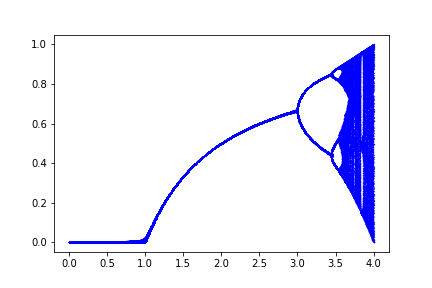

In [36]:
plot_bifurcation(x0=0.1)

## Układ Lorenza
Układ Lorentza to układ trzech równań w postaci:

\begin{align}
\frac{dx}{dt} & = \sigma(y-x) \\
\frac{dy}{dt} & = \rho x - y - xz \\
\frac{dz}{dt} & = -\beta z + xy
\end{align}

__Zadanie__: Poniższy kod wizualizuje układ Lorentza dla zadanych parametrów s,r,b. Zobacz jak układ wygląda dla zadanych parametrów i sprawdź, jak zmiana parametrów tego układu wpływa na kształt atraktora

In [ ]:
%matplotlib notebook
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

s = 2.
r = 30.
b = 3.
Dt = 0.01

def initialize():
    global x, xresult, y, yresult, z, zresult, t, timesteps
    x = 1.
    y = 1.
    z = 1.
    
    xresult = [x]
    yresult = [y]
    zresult = [z]
    t = 0.
    timesteps = [t]
    
def observe():
    global x, xresult, y, yresult, z, zresult, t, timesteps
    xresult.append(x)
    yresult.append(y)
    zresult.append(z)
    timesteps.append(t)

def update():
    global x, xresult, y, yresult, z, zresult, t, timesteps
    nextx = x + (s * (y - x)) * Dt
    nexty = y + (r * x - y - x * z) * Dt
    nextz = z + (x * y - b * z) * Dt
    x, y, z = nextx, nexty, nextz
    t = t + Dt

initialize()
while t < 30.:
    update()
    observe()

subplot(3, 1, 1)
plot(timesteps, xresult)
xlabel('t')
ylabel('x')

subplot(3, 1, 2)
plot(timesteps, yresult)
xlabel('t')
ylabel('y')

subplot(3, 1, 3)
plot(timesteps, zresult)
xlabel('t')
ylabel('z')

figure()
ax = gca(projection='3d')
ax.plot(xresult, yresult, zresult, 'b')

show()


# Inne funkcje PyCX 

## Przykładowe symulacje związane z automatami komórkowymi
Ze względu, że oryginalna biblioteka pycxsimulator korzysta z okienek GUI tworzonych za pomocą Tkinter, nie może być ona bezpośrednio użyta w Jupyterze. W związku w tym w repozytorium https://github.com/Chimstaz/PyCXlab przygotowaliśmy wersję pycxsimulator.py, która implementuje część funkcjonalności za pomocą widgetów Jupytera.

### Forest fire

In [29]:
%matplotlib inline
# Simple CA simulator in Python
#
# *** Forest fire ***
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu
#
# Ported to Python 3 and added parameter setters
# by Przemyslaw Szufel & Bogumil Kaminski
# {pszufe, bkamins}@sgh.waw.pl

import matplotlib
#matplotlib.use('qt4agg')

import pylab as PL
import random as RD
import scipy as SP

RD.seed()

width = 100
height = 100
initProb = 0.4
empty, tree, fire, char = range(4)

def initProbF (val=initProb):
    """
    Population size.
The parameter change is effective only when model is reset.
    """
    global initProb
    initProb = val
    return val

def widthF (val=width):
    """
    Grid width.
    The parameter change is effective only when model is reset.
    """
    global width
    width = int(val)
    return val

def heightF (val=height):
    """
    Grid height.
    The parameter change is effective only when model is reset.
    """
    global height
    height = int(val)
    return val

def init():
    global time, config, nextConfig

    time = 0

    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    config[int(height/2), int(width/2)] = fire

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.axis('image')
    PL.title('t = ' + str(time))

def step():
    global time, config, nextConfig

    time += 1

    height, width = config.shape

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == fire:
                state = char
            elif state == tree:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            state = fire
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config

import pycxsimulator
pSetters = [initProbF,widthF,heightF]
pycxsimulator.GUI(parameterSetters = pSetters).start(func=[init,draw,step])


### Game of Life

In [30]:
%matplotlib inline

# Simple CA simulator in Python
#
# *** Game of Life Rule ***
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu
#
# Ported to Python 3 and added parameter setters
# by Przemyslaw Szufel & Bogumil Kaminski
# {pszufe, bkamins}@sgh.waw.pl

import matplotlib
#matplotlib.use('qt4agg')

import pylab as PL
import random as RD
import scipy as SP

RD.seed()

width = 50
height = 50
initProb = 0.2

def initProbF (val=initProb):
    """
    Population size.
The parameter change is effective only when model is reset.
    """
    global initProb
    initProb = val
    return val

def widthF (val=width):
    """
    Grid width.
    The parameter change is effective only when model is reset.
    """
    global width
    width = int(val)
    return val

def heightF (val=height):
    """
    Grid height.
    The parameter change is effective only when model is reset.
    """
    global height
    height = int(val)
    return val

def init():
    global time, config, nextConfig

    time = 0
    
    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = 1
            else:
                state = 0
            config[y, x] = state

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 1, cmap = PL.cm.binary)
    PL.axis('image')
    PL.title('t = ' + str(time))

def step():
    global time, config, nextConfig

    time += 1

    height, width = config.shape

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            numberOfAlive = 0
            for dx in range(-1, 2):
                for dy in range(-1, 2):
                    numberOfAlive += config[(y+dy)%height, (x+dx)%width]
            if state == 0 and numberOfAlive == 3:
                state = 1
            elif state == 1 and (numberOfAlive < 3 or numberOfAlive > 4):
                state = 0
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config

import pycxsimulator
pSetters = [initProbF,widthF,heightF]
pycxsimulator.GUI(parameterSetters = pSetters).start(func=[init,draw,step])


## Inne symulacje w PyCX
(może coś oprócz automatów komórkowych)

# Zadania

__Zadanie 1__: Przeanalizuj wpływ zmiany precyzji na wykres bifurkacji utworzony przez odwzorowanie logistyczne (zmiana precyzji obliczeń zmiennoprzecinkowych decimal.getcontext().prec).

<IPython.core.display.Javascript object>


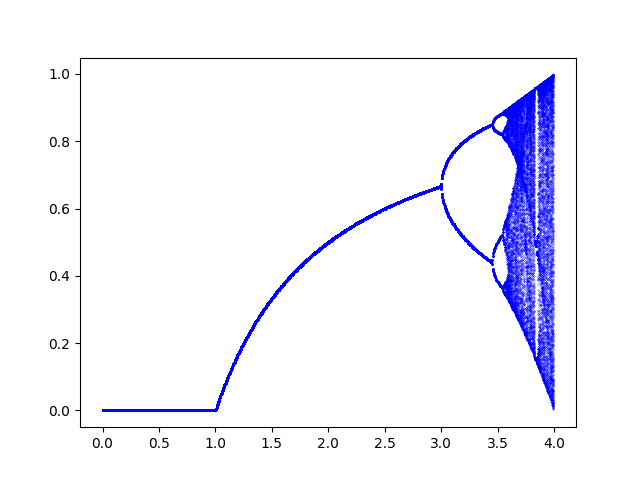

In [27]:
import decimal
%matplotlib notebook
# Drawing bifurcation diagrams in Python
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu
#
# Ported to Python 3 by Przemyslaw Szufel & Bogumil Kaminski 2013
# {pszufe, bkamins}@sgh.waw.pl

import pylab as PL

decimal.getcontext().prec = 28

# define an iterative map

def f(x):
    return a * x * (1 - x)

# draw a bifurcation diagram

x0 = decimal.Decimal(0.1)
samplingStartTime = 1000
sampleNumber = 200

resultA = []
resultX = []

a = decimal.Decimal(0)
da = decimal.Decimal(0.005)

while a <= decimal.Decimal(4.0):
    x = x0
    for t in range(samplingStartTime):
        x = f(x)
    for t in range(sampleNumber):
        x = f(x)
        resultA.append(a)
        resultX.append(x)
    a += da

PL.plot(resultA, resultX, 'bo', markersize=0.2)
PL.show()

__Zadanie 2__: Zbadaj wpływ zaburzenia funkcji przez wartość stałą $k$ na wykres bifurkacji

<IPython.core.display.Javascript object>


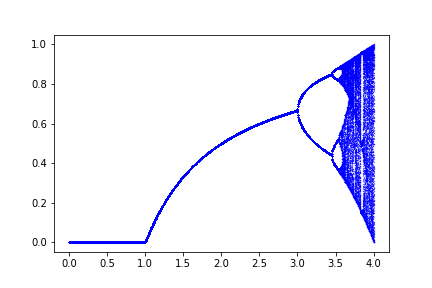

In [56]:
%matplotlib notebook

k = 0

def f(a, x):
    return a * x * (1 - x) + k

# plot_bifurcation was defined near begging of the notebook
plot_bifurcation(x0=0.1)

__Zadanie 2__: Sterując wartościami początkowymi x, y, z sprawdź jak zachowuje się układ dla różnych wartości startowych. Możesz także sterować liczbą iteracji.

<IPython.core.display.Javascript object>


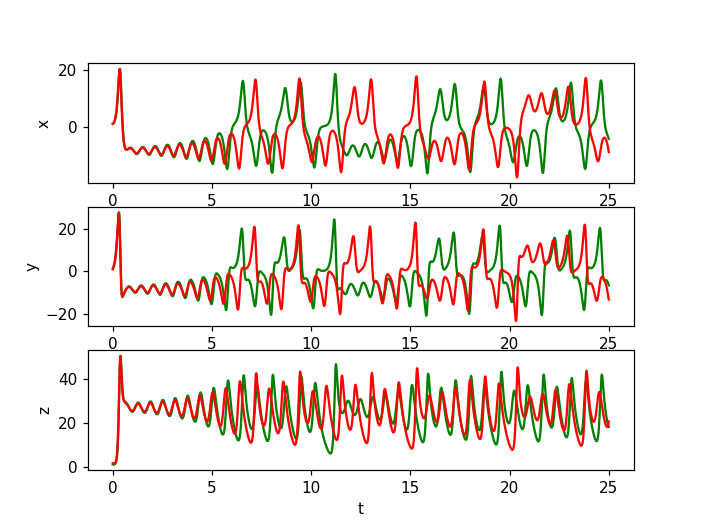

<IPython.core.display.Javascript object>


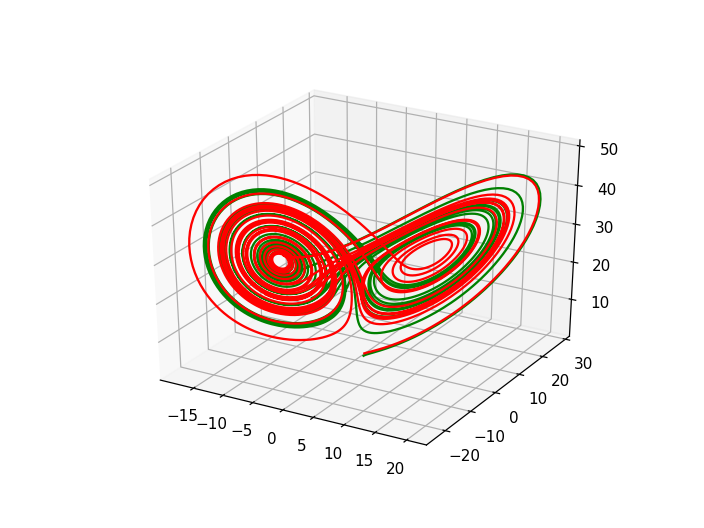

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses t

In [14]:
%matplotlib notebook
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

colorIndex = 0
figureIndex = 0
colors = ['b','g','r','c','m','y','b']


def next_colour():
    global colorIndex
    colorIndex+=1
    return colors[ colorIndex % len(colors) ]

def next_figure():
    global figureIndex
    figureIndex+=1
    return figureIndex;

def draw_lorentz(iters,s,r,b,x,y,z):
    
    # initialize  
    xresult = [x]
    yresult = [y]
    zresult = [z]
    t = 0.
    timesteps = [t]
    
    while t < iters *1.:
        #update
        nextx = x + (s * (y - x)) * Dt
        nexty = y + (r * x - y - x * z) * Dt
        nextz = z + (x * y - b * z) * Dt
        x, y, z = nextx, nexty, nextz
        t = t + Dt
        #observe
        xresult.append(x)
        yresult.append(y)
        zresult.append(z)
        timesteps.append(t)
    
    c1 = next_colour()
    figure(1)
    subplot(3, 1, 1)
    plot(timesteps, xresult,color=c1 )
    xlabel('t')
    ylabel('x')
    
    subplot(3, 1, 2)
    plot(timesteps, yresult,color=c1)
    xlabel('t')
    ylabel('y')
    
    subplot(3, 1, 3)
    plot(timesteps, zresult,color=c1)
    xlabel('t')
    ylabel('z')
    
    figure(2)
    ax = gca(projection='3d')
    ax.plot(xresult, yresult, zresult, color=c1)
    
    

# parameters
iters = 25
s = 10.
r = 28.
b = 8/3.
Dt = 0.005    
    
x = 1.
y = 1.
z = 1.

draw_lorentz(iters,s,r,b,x,y,z)
#draw_lorentz(iters,s,r,b,x,y,z)



show()

